In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [5]:
thyroid = pd.read_csv('hypothyroid.csv', na_values='?' )
pd.set_option('display.max_columns', None)
thy =thyroid.copy()
thy.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [6]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [7]:
thy.describe(include=[object])

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,t,t,f,other,P
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [8]:
thy.describe(include='all')


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3771.000000,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3403.000000,3772,3003.000000,3772,3541.000000,3772,3385.000000,3772,3387.000000,3772,0.0,3772,3772
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,NaN,5,2
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,NaN,t,NaN,t,NaN,t,NaN,t,NaN,f,NaN,other,P
freq,NaN,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,NaN,3003,NaN,3541,NaN,3385,NaN,3387,NaN,3772,NaN,2201,3481
mean,51.735879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.086766,NaN,2.013500,NaN,108.319345,NaN,0.995000,NaN,110.469649,NaN,NaN,NaN,NaN
std,20.084958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.521470,NaN,0.827434,NaN,35.604248,NaN,0.195457,NaN,33.089698,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,0.050000,NaN,2.000000,NaN,0.250000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,1.600000,NaN,88.000000,NaN,0.880000,NaN,93.000000,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,2.000000,NaN,103.000000,NaN,0.980000,NaN,107.000000,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,2.400000,NaN,124.000000,NaN,1.080000,NaN,124.000000,NaN,NaN,NaN,NaN


### Ecnoding the categorical and binary variables

In [9]:
thy_enc=thy.copy()
# Convert 'sex' and 'binaryClass' to numeric values
thy_enc['sex'] = thy_enc['sex'].map({'F': 0, 'M': 1})
thy_enc['binaryClass'] = thy_enc['binaryClass'].map({'N': 0, 'P': 1})

# Convert other binary variables to numeric values
binary_columns = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                  'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                  'query hypothyroid', 'query hyperthyroid', 'lithium',
                  'goitre', 'tumor', 'hypopituitary', 'psych',
                  'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
                  'FTI measured']
thy_enc[binary_columns] = thy_enc[binary_columns].replace({'f': 0, 't': 1})

# Verify the updated DataFrame
thy_enc.head(5)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,f,NaN,SVHC,1
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,f,NaN,other,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,f,NaN,other,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,f,NaN,other,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,f,NaN,SVI,1


In [10]:
# Dummyfy categorical column: referral scource as it has 5 unique
ref_dummify = pd.get_dummies(thy_enc['referral source'],prefix='ref_',)

#concatenate
thy_enc = pd.concat([thy_enc,ref_dummify], axis=1)


thy_enc.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,f,NaN,SVHC,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,f,NaN,other,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,f,NaN,other,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,f,NaN,other,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,f,NaN,SVI,1,0,0,0,1,0


In [11]:
thy_enc.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3403.000000,3772.000000,3003.000000,3772.000000,3541.000000,3772.000000,3385.000000,3772.000000,3387.000000,0.0,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,0.902174,5.086766,0.796129,2.013500,0.938759,108.319345,0.897402,0.995000,0.897932,110.469649,NaN,0.922853,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,0.068924,0.094525,0.157510,0.016282,0.215437,0.297119,24.521470,0.402927,0.827434,0.239803,35.604248,0.303473,0.195457,0.302778,33.089698,NaN,0.266861,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.250000,0.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.600000,1.000000,88.000000,1.000000,0.880000,1.000000,93.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.980000,1.000000,107.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.700000,1.000000,2.400000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    3481
0     291
Name: binaryClass, dtype: int64

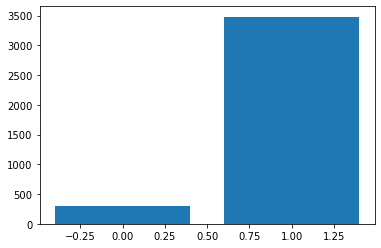

In [12]:
#Imbalanced class
plt.bar(thy_enc.binaryClass.value_counts().index,thy_enc.binaryClass.value_counts().values)
thy_enc.binaryClass.value_counts()

### Checking Missing Data

In [13]:
thy_enc.isna().sum(axis=0).sort_values(ascending=False)

TBG                          3772
T3                            769
T4U                           387
FTI                           385
TSH                           369
TT4                           231
sex                           150
age                             1
I131 treatment                  0
T4U measured                    0
ref__SVI                        0
ref__SVHD                       0
ref__SVHC                       0
ref__STMW                       0
binaryClass                     0
referral source                 0
on thyroxine                    0
TBG measured                    0
query on thyroxine              0
FTI measured                    0
on antithyroid medication       0
sick                            0
query hypothyroid               0
TT4 measured                    0
pregnant                        0
T3 measured                     0
thyroid surgery                 0
TSH measured                    0
psych                           0
hypopituitary 

In [14]:
#checking if missing values corrosponds to 'f' in measured column

col_missing_test_value = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in col_missing_test_value:
    print(col, thy_enc[col].isna().sum(), thy_enc[col][thy_enc[col+' measured']==0].isna().sum())

TSH 369 369
T3 769 769
TT4 231 231
T4U 387 387
FTI 385 385


In [15]:
countinous_col = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']

### Dropping redundant columns

In [16]:
# Drop the original column 'referral source' as dummified, 'TBG'
thy_enc = thy_enc.drop(['referral source','TBG', 'TBG measured'], axis=1)

## EDA

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

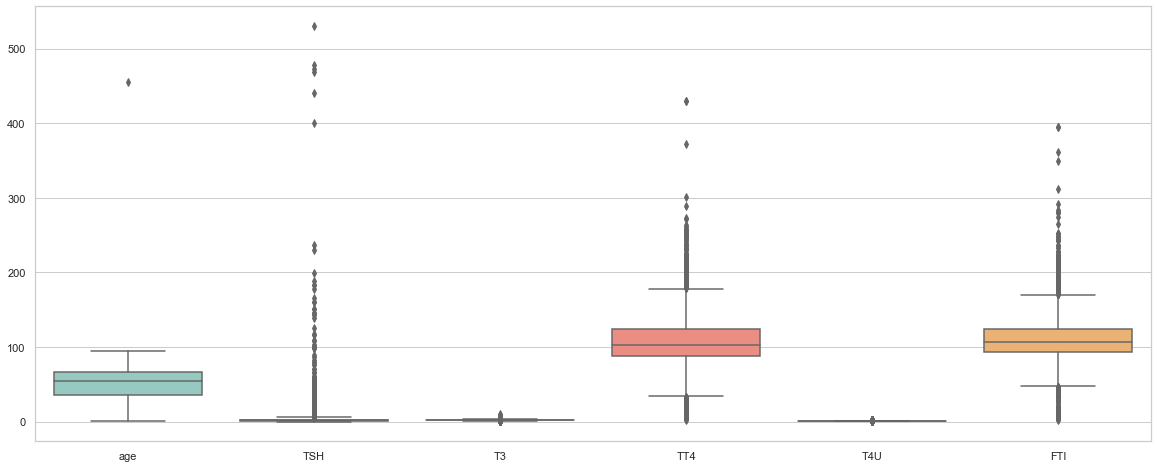

In [17]:
#Boxplot

#list of continuous column names
continuous_cols = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(20,8))
# Set a different style for the plot
sns.set(style='whitegrid')
sns.boxplot(data=thy_enc[continuous_cols], palette='Set3')

In [18]:
#sns.pairplot(thy_enc, hue="sex",diag_kind='kde' )

## Violin plot

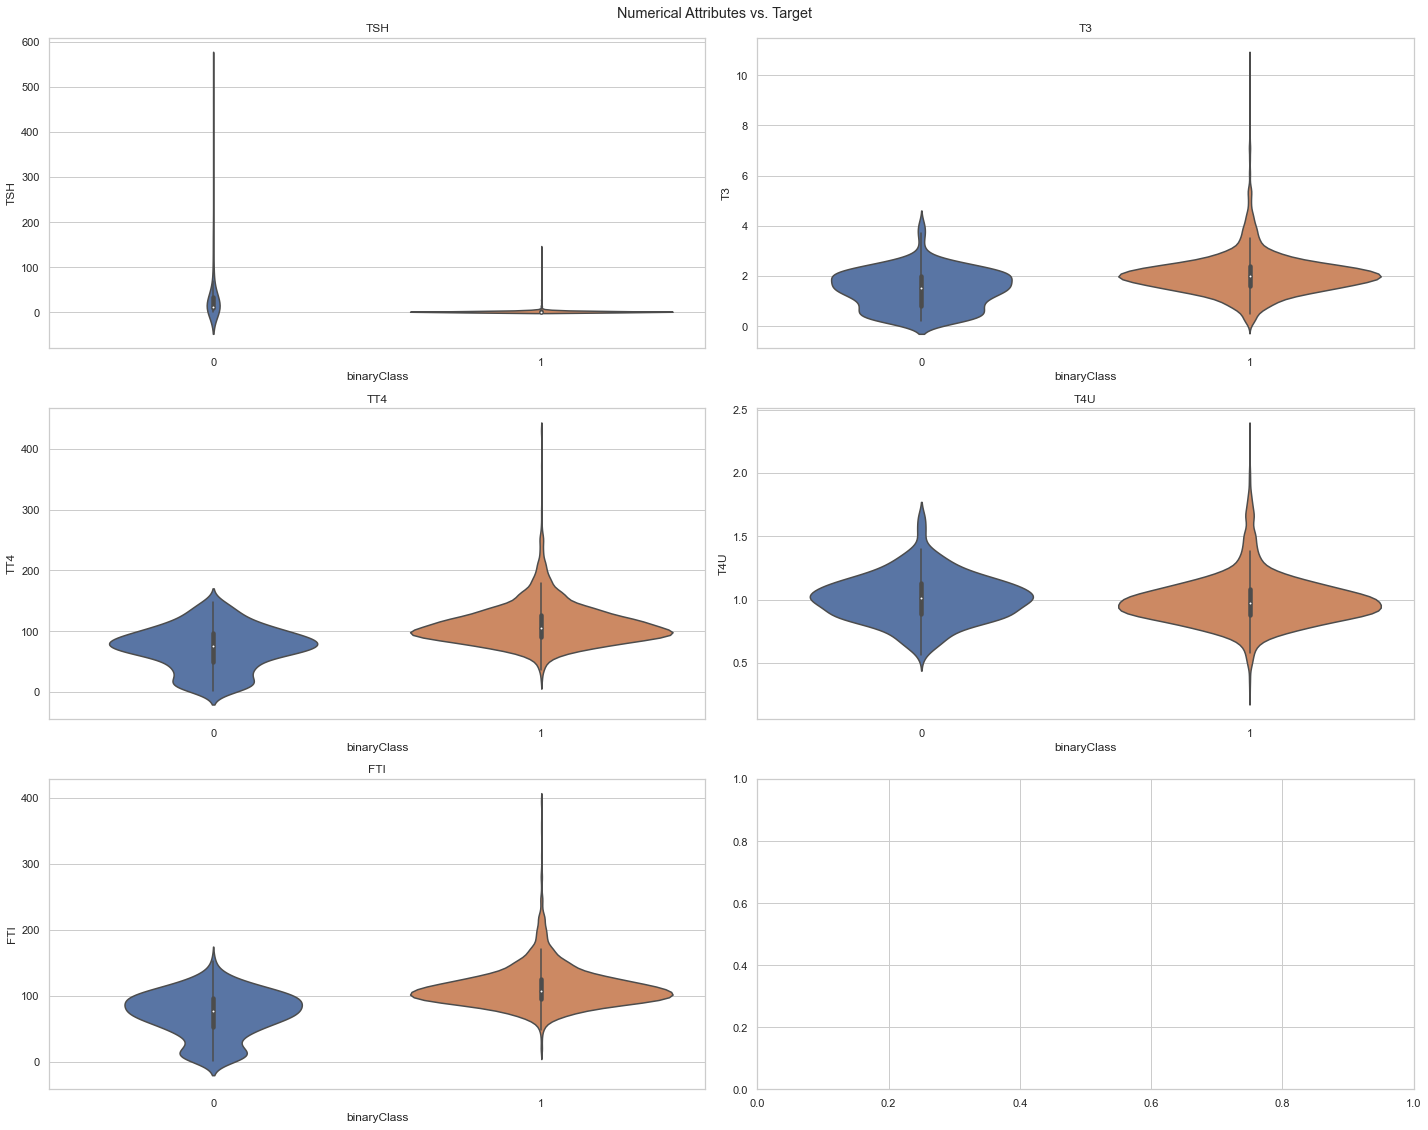

In [208]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid')

# TSH vs. 'target'
sns.violinplot(x=thy_enc.binaryClass, y=thy_enc.TSH, ax=axes[0, 0])
axes[0, 0].set_title('TSH')

# T3 vs. 'target'
sns.violinplot(x=thy_enc.binaryClass, y=thy_enc.T3, ax=axes[0, 1])
axes[0, 1].set_title('T3')

# TT4 vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.TT4, ax=axes[1, 0])
axes[1, 0].set_title('TT4')

# T4U vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.T4U, ax=axes[1, 1])
axes[1, 1].set_title('T4U')

# FTI vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.FTI, ax=axes[2, 0])
axes[2, 0].set_title('FTI')



plt.tight_layout()
plt.show()


## Box-plot

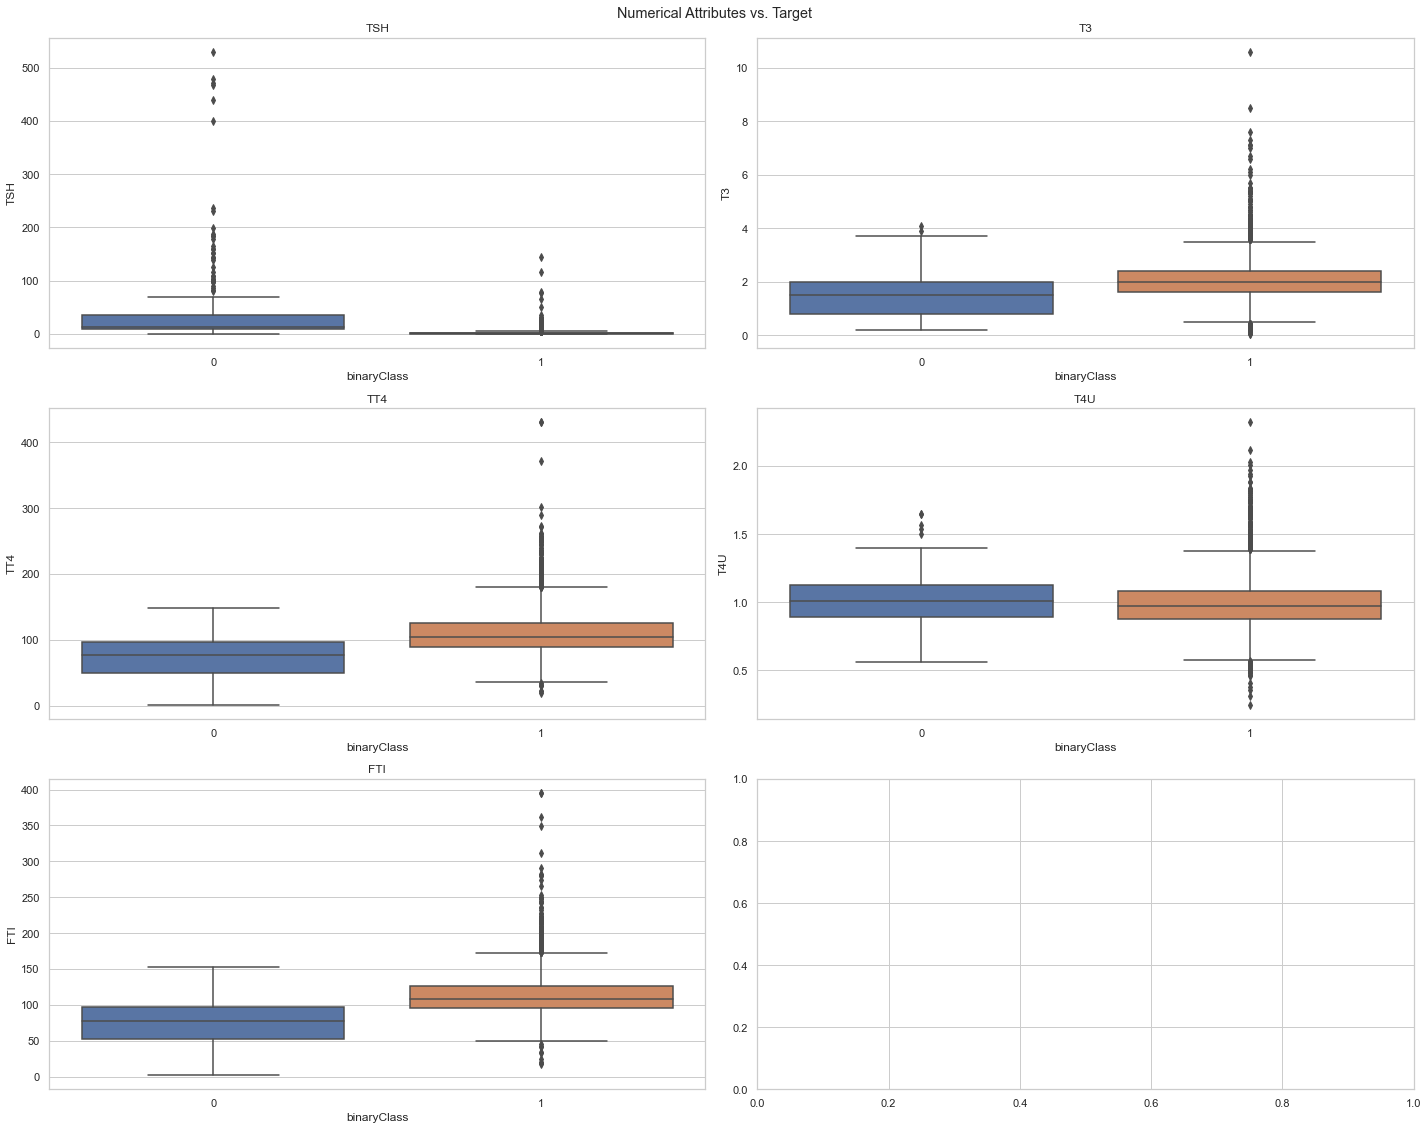

In [209]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid')

# TSH vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.TSH, ax=axes[0, 0])
axes[0, 0].set_title('TSH')

# T3 vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.T3, ax=axes[0, 1])
axes[0, 1].set_title('T3')

# TT4 vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.TT4, ax=axes[1, 0])
axes[1, 0].set_title('TT4')

# T4U vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.T4U, ax=axes[1, 1])
axes[1, 1].set_title('T4U')

# FTI vs. 'target'
sns.boxplot(x=thy_enc.binaryClass, y=thy_enc.FTI, ax=axes[2, 0])
axes[2, 0].set_title('FTI')



plt.tight_layout()
plt.show()


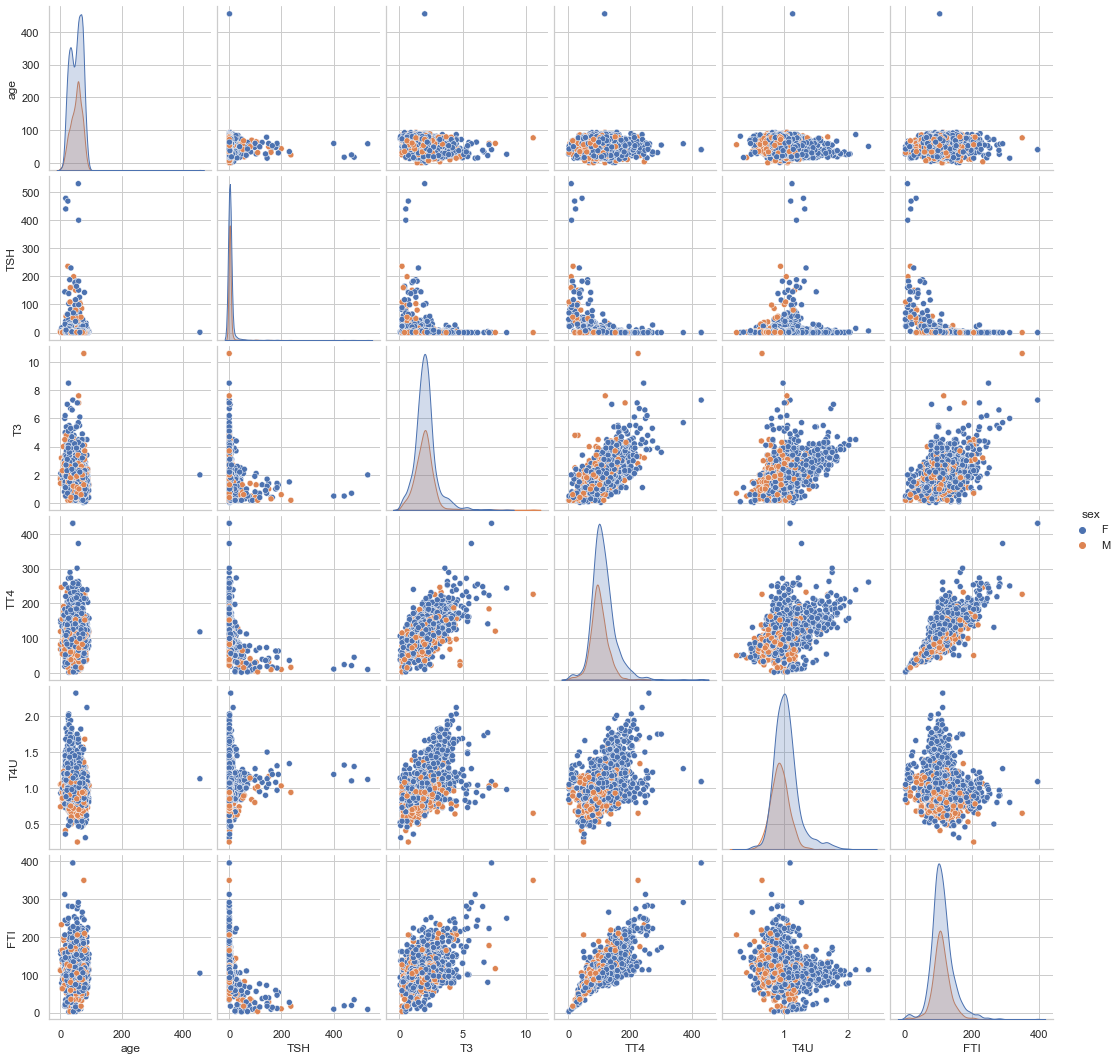

In [94]:
pairplot_subset = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI','sex','binaryClass']
sns.pairplot(thy[pairplot_subset], hue="sex",diag_kind='kde' )

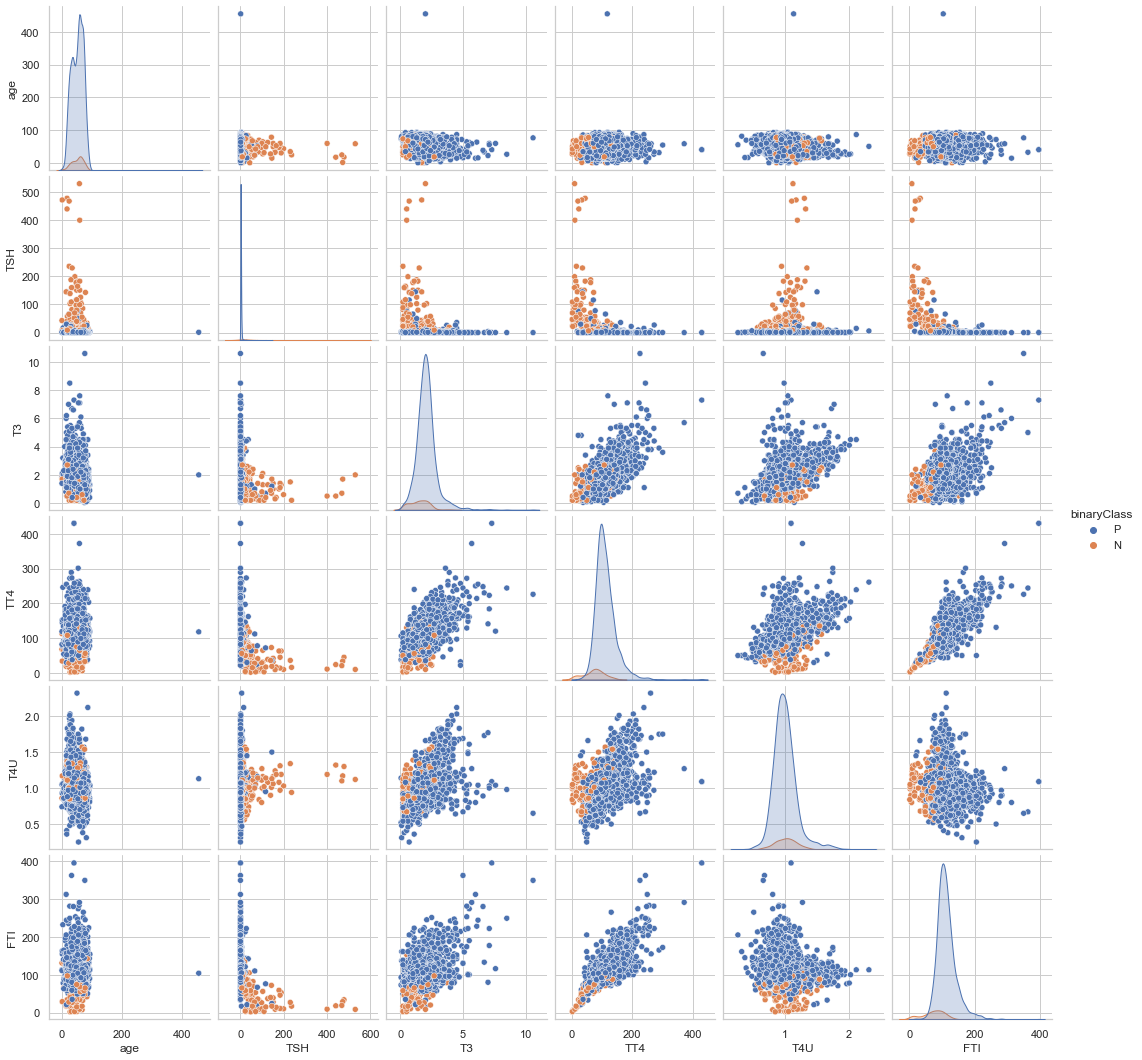

In [95]:
pairplot_subset = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI','sex','binaryClass']
sns.pairplot(thy[pairplot_subset], hue="binaryClass",diag_kind='kde' )

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.


  Using cached dython-0.7.4-py3-none-any.whl (24 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached psutil-5.9.5-cp36-abi3-win_amd64.whl (255 kB)
  Using cached contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)


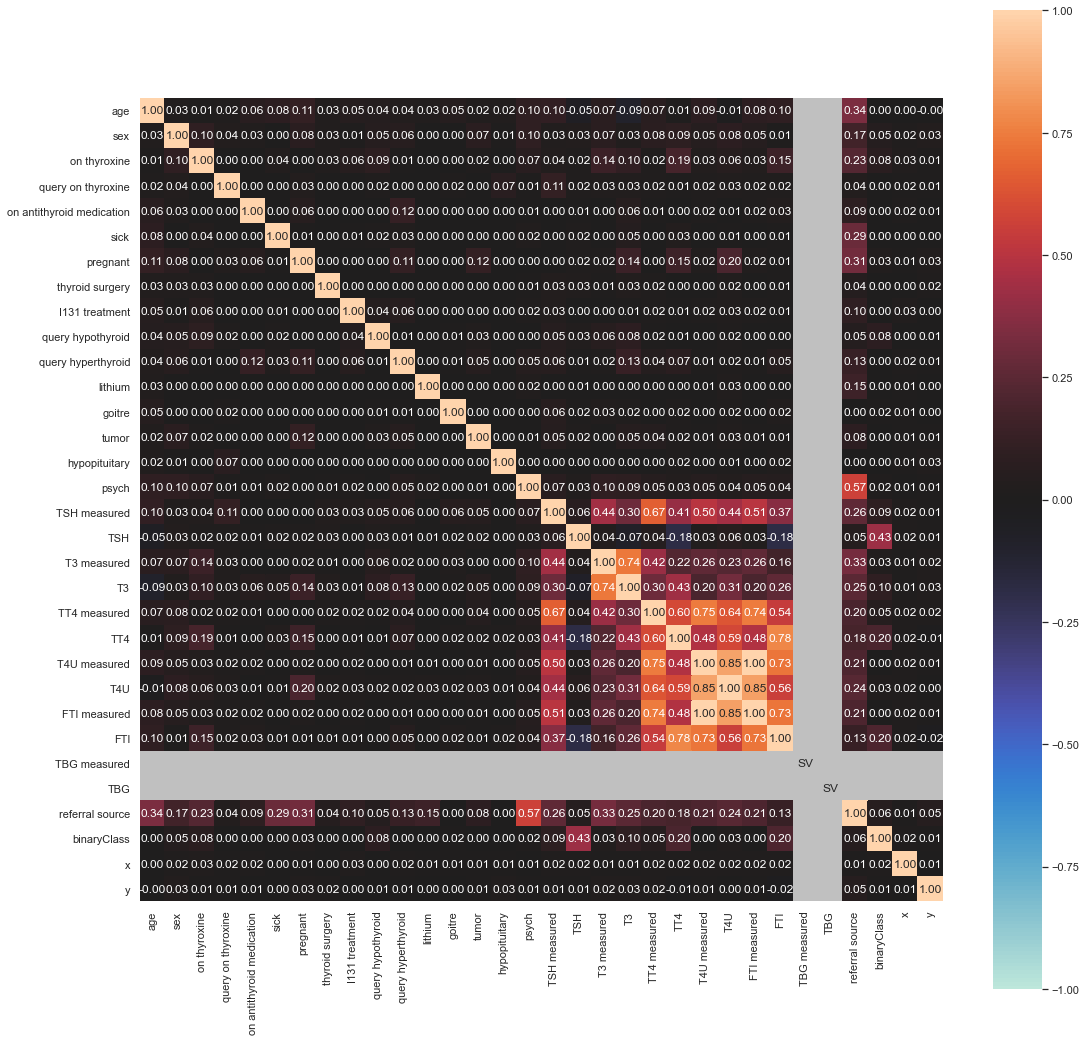

In [98]:
!pip install dython --user
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features = identify_nominal_columns(thy)

associations(thy, 
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, clustering=False, title=None, filename=None, 
            figsize=(18,18));

### Outlier can be observed in Age column, replacing it to Nan

In [20]:
print(thy_enc.age.max()) #before
thy_enc['age']=thy_enc['age'].replace(thy_enc.age.max(),np.nan)
thy_enc.age.max() #after

455.0


94.0

In [21]:
thy_enc

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,41.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1
3768,68.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.00,1,2.1,1,124.0,1,1.08,1,114.0,1,0,0,0,1,0
3769,74.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5.10,1,1.8,1,112.0,1,1.07,1,105.0,1,0,0,0,0,1
3770,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.70,1,2.0,1,82.0,1,0.94,1,87.0,1,0,0,0,1,0


#### Handling columns with missing 'sex' but pregnancy =True

In [22]:
pregnancy_mask = thy_enc[(thy_enc['pregnant'] == 1) & (thy_enc['sex'].isna())]
pregnancy_mask

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
1609,73.0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.2,1,2.5,1,110.0,1,1.28,1,85.0,1,0,0,0,0,1
3271,21.0,NaN,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2.4,1,3.5,1,171.0,1,1.49,1,115.0,1,1,0,0,0,0


In [23]:
thy_enc.loc[pregnancy_mask.index, 'sex'] = 1

In [24]:
thy_enc.iloc[[1609, 3271], :]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
1609,73.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.2,1,2.5,1,110.0,1,1.28,1,85.0,1,0,0,0,0,1
3271,21.0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2.4,1,3.5,1,171.0,1,1.49,1,115.0,1,1,0,0,0,0


In [25]:
thy_enc.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass', 'ref__STMW', 'ref__SVHC',
       'ref__SVHD', 'ref__SVI', 'ref__other'],
      dtype='object')

### Train Test split

In [26]:
X = thy_enc[['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
             'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre',
             'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4',
             'T4U measured', 'T4U', 'FTI measured', 'FTI', 'ref__STMW', 'ref__SVHC', 'ref__SVHD',
             'ref__SVI', 'ref__other']]

y = thy_enc['binaryClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

In [27]:
y_test.value_counts() #Test set

1    870
0     73
Name: binaryClass, dtype: int64

In [28]:
y_train.value_counts()  #Training set

1    2611
0     218
Name: binaryClass, dtype: int64

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 2185 to 1619
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2827 non-null   float64
 1   sex                        2717 non-null   float64
 2   on thyroxine               2829 non-null   int64  
 3   query on thyroxine         2829 non-null   int64  
 4   on antithyroid medication  2829 non-null   int64  
 5   sick                       2829 non-null   int64  
 6   pregnant                   2829 non-null   int64  
 7   thyroid surgery            2829 non-null   int64  
 8   I131 treatment             2829 non-null   int64  
 9   query hypothyroid          2829 non-null   int64  
 10  query hyperthyroid         2829 non-null   int64  
 11  lithium                    2829 non-null   int64  
 12  goitre                     2829 non-null   int64  
 13  tumor                      2829 non-null   in

In [30]:
#Scaling the train and test data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#For the test data, we use the transform method instead of fit_transform.
# This is because we want to apply the same scaling transformation learned from the training data without re-computing the mean and standard deviation.


# Create and fit the KNNImputer
imputer = KNNImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [ ]:
# Convert imputed values in the 'sex' column to binary values
sex_column_index = X_train_scaled.columns.get_loc('sex')
X_train_imputed[:, sex_column_index] = np.round(X_train_imputed[:, sex_column_index])

In [31]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [32]:
merged_df = pd.concat([X_train_imputed_df, X_test_imputed_df], ignore_index=True)
merged_df.shape

(3772, 31)

#### handlin sex column to have only 2 distinct values for O and 1

In [167]:
X_train_imputed_df
print(X_train_imputed_df.sex.unique())

[-0.67705275  1.47698979  1.04618128 -0.24624424  0.61537277  0.61537277
  0.18456426  0.18456426  0.18456426 -0.24624424]


In [169]:
# Unscale the imputed values
X_train_unscaled = scaler.inverse_transform(X_train_imputed)
X_test_unscaled = scaler.inverse_transform(X_test_imputed)

In [170]:
# df where the values are unscaled after (scaling>knnimputer)
X_train_imputed_UNSCALED_df = pd.DataFrame(X_train_unscaled, columns=X_train.columns)
X_test_imputed_UNSCALED_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [216]:
merged_UNSCALED_df = pd.concat([X_train_imputed_UNSCALED_df, X_test_imputed_UNSCALED_df], ignore_index=True)




array([-0.67705275,  1.47698979, -0.24624424, -0.24624424,  0.18456426,
        0.61537277,  0.18456426,  0.18456426,  0.61537277])

In [173]:
X_train_imputed_UNSCALED_df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,2.50,1.0,2.00,1.0,134.0,1.0,1.17,1.0,115.0,0.0,0.0,1.0,0.0,0.0
1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,44.00,1.0,1.70,1.0,59.0,1.0,1.04,1.0,57.0,0.0,0.0,0.0,0.0,1.0
2,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,7.20,1.0,2.30,1.0,111.0,1.0,0.99,1.0,112.0,0.0,0.0,0.0,0.0,1.0
3,67.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,1.40,1.0,1.50,1.0,95.0,1.0,0.78,1.0,122.0,0.0,0.0,0.0,1.0,0.0
4,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,0.85,0.0,1.98,1.0,131.0,1.0,0.91,1.0,144.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,1.90,1.0,1.40,1.0,107.0,1.0,0.92,1.0,116.0,0.0,0.0,0.0,0.0,1.0
2825,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,1.0,1.0,0.25,1.0,1.80,1.0,120.0,1.0,0.85,1.0,140.0,0.0,1.0,0.0,0.0,0.0
2826,65.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,2.50,0.0,1.76,1.0,137.0,1.0,1.06,1.0,129.0,0.0,0.0,0.0,0.0,1.0
2827,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,1.0,0.80,1.0,1.80,1.0,93.0,1.0,0.79,1.0,117.0,0.0,1.0,0.0,0.0,0.0


In [50]:
merged_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other,x,y
0,1.119815,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,3.954893,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.108011,0.508382,-0.021954,0.261445,0.725738,0.342489,0.917381,0.341844,0.122517,-0.182307,-0.336662,9.349131,-0.603895,-1.193384,6.270190,-36.343662
1,-0.726268,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,1.525426,0.508382,-0.388068,0.261445,-1.397057,0.342489,0.250040,0.341844,-1.635931,-0.182307,-0.336662,-0.106962,-0.603895,0.837953,4.019040,-4.541667
2,-0.620778,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,0.076981,0.508382,0.344160,0.261445,0.074748,0.342489,-0.006630,0.341844,0.031563,-0.182307,-0.336662,-0.106962,-0.603895,0.837953,11.990836,11.513722
3,0.803343,1.476990,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.151307,0.508382,-0.632144,0.261445,-0.378115,0.342489,-1.084642,0.341844,0.334744,-0.182307,-0.336662,-0.106962,1.655918,-1.193384,-18.001478,-38.288589
4,1.067069,-0.677053,-0.3665,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.172955,-1.967026,-0.046361,0.261445,0.640827,0.342489,-0.417301,0.341844,1.001741,-0.182307,-0.336662,-0.106962,-0.603895,0.837953,38.518242,11.252993


## TSNE

#### tsne can only handle Numeric values. No nan & categorical variables. t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a lower-dimensional space. It is particularly useful for exploring and understanding complex patterns and relationships in the data.

In [86]:
#we first run the tsne on numeric non nan data and extracts the components. the tsne = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=50)
from sklearn.manifold import TSNE
m = TSNE(learning_rate=5)#(n_components=2, learning_rate='auto',init='pca', perplexity=50)
tsne_features = m.fit_transform(thy[continuous_cols].dropna()) #df with continous columns Na removed
tsne_features[:,:]

array([[  6.8581023,  13.851679 ],
       [-27.560303 ,  -5.5613227],
       [ -9.266169 , -21.69337  ],
       ...,
       [  3.1384842, -16.696093 ],
       [-23.633635 , -14.924537 ],
       [-10.355892 , -14.663831 ]], dtype=float32)

In [78]:
thy_cont.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass', 'x', 'y'],
      dtype='object')

<ipython-input-93-01572dfd0486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thy_cont['x'] =tsne_features[:,0]
<ipython-input-93-01572dfd0486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thy_cont['y']=tsne_features[:,1]


<AxesSubplot:xlabel='x', ylabel='y'>

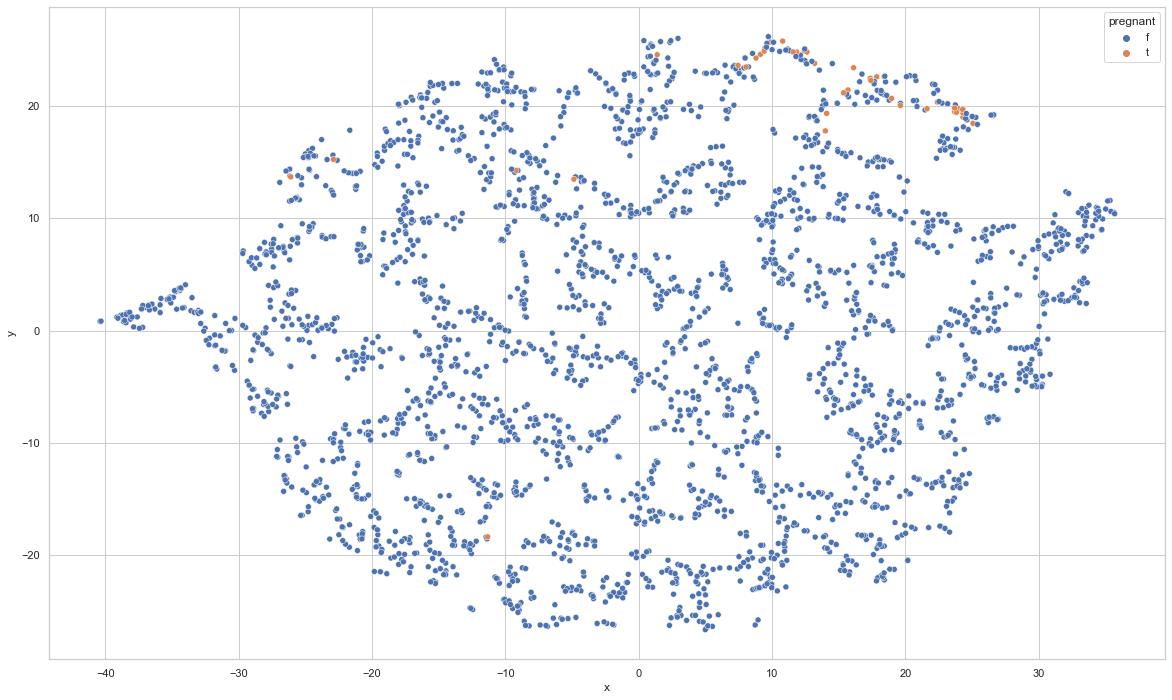

In [93]:
thy_cont=thy.dropna(subset=continuous_cols)   #df with all columns and  Na removed for only continous columns
thy_cont['x'] =tsne_features[:,0]
thy_cont['y']=tsne_features[:,1]


plt.figure(figsize=(20,12))
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='pregnant', data=thy_cont)   #try to use categorical variable(sex) in hue to visualize the pattern if any

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=13)

# Fit the classifier on the training data
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[ 72   1]
 [  5 865]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       1.00      0.99      1.00       870

    accuracy                           0.99       943
   macro avg       0.97      0.99      0.98       943
weighted avg       0.99      0.99      0.99       943

F1 Score: 0.9965437788018433


#### RF classifier with unscaled values (i.e. the initial [problem that the sex had multiple unique values then just 1 and 0 tend to have been resolved been resolved ])

In [204]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=3)

# Fit the classifier on the training data
rf_classifier.fit(X_train_unscaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_unscaled, )
#-------------------------------------------------------------------

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[ 72   1]
 [  4 866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       1.00      1.00      1.00       870

    accuracy                           0.99       943
   macro avg       0.97      0.99      0.98       943
weighted avg       0.99      0.99      0.99       943

F1 Score: 0.9971214738054116


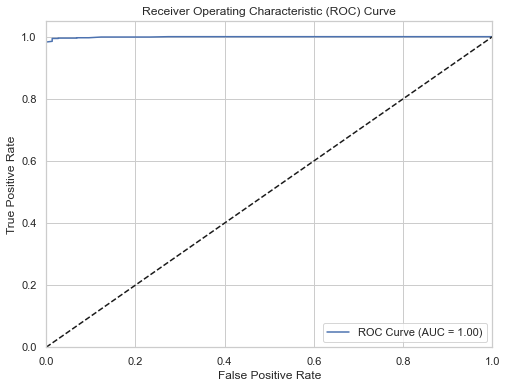

In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for class 1
y_pred_proba = rf_classifier.predict_proba(X_test_unscaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal dotted line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [104]:
#Scaling the train and test data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#For the test data, we use the transform method instead of fit_transform.
# This is because we want to apply the same scaling transformation learned from the training data without re-computing the mean and standard deviation.


# Create and fit the KNNImputer
imputer = KNNImputer()
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_imputed)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Confusion Matrix:
[[ 72   1]
 [  4 866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       1.00      1.00      1.00       870

    accuracy                           0.99       943
   macro avg       0.97      0.99      0.98       943
weighted avg       0.99      0.99      0.99       943

F1 Score: 0.9971214738054116


scalers = [None, StandardScaler(), MinMaxScaler()]  ||  
classifiers = [RandomForestClassifier(),CatBoostClassifier(silent=True),XGBClassifier(),AdaBoostClassifier(),LogisticRegression(),DecisionTreeClassifier()]

### Feature Selection using RFE

In [110]:
# Print the importances per feature
print(dict(zip(X_test_imputed_df.columns, rf_classifier.feature_importances_.round(2))))

mask = rf_classifier.feature_importances_ > 0.05   #pick only features that have importance value over 0.05

reduced_X_test_imputed_df= X_test_imputed_df.loc[:,mask]

reduced_X_test_imputed_df.columns

{'age': 0.03, 'sex': 0.01, 'on thyroxine': 0.05, 'query on thyroxine': 0.0, 'on antithyroid medication': 0.0, 'sick': 0.0, 'pregnant': 0.0, 'thyroid surgery': 0.01, 'I131 treatment': 0.0, 'query hypothyroid': 0.0, 'query hyperthyroid': 0.0, 'lithium': 0.0, 'goitre': 0.0, 'tumor': 0.0, 'hypopituitary': 0.0, 'psych': 0.0, 'TSH measured': 0.03, 'TSH': 0.51, 'T3 measured': 0.01, 'T3': 0.04, 'TT4 measured': 0.01, 'TT4': 0.1, 'T4U measured': 0.01, 'T4U': 0.03, 'FTI measured': 0.01, 'FTI': 0.13, 'ref__STMW': 0.0, 'ref__SVHC': 0.0, 'ref__SVHD': 0.0, 'ref__SVI': 0.01, 'ref__other': 0.01}


Index(['TSH', 'TT4', 'FTI'], dtype='object')

In [163]:
from sklearn.feature_selection import RFE #recursive feature extraction -- one by one

# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=1, step=2) # can use step=2 to drop 2 features each time

# Fit the model to the training data
rfe.fit(X_train_imputed, y_train)

# Create a mask using the support_ attribute of rfe
mask_rfe= rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X_train_imputed_df_RFE = X_train_imputed_df.loc[:, mask_rfe]
reduced_X_train_imputed_df_RFE

Fitting estimator with 31 features.
Fitting estimator with 29 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.


,age,on thyroxine,thyroid surgery,TSH measured,TSH,T3,TT4 measured,TT4,T4U,FTI
0,1.119815,-0.366500,-0.113531,0.334706,-0.108011,-0.021954,0.261445,0.725738,0.917381,0.122517
1,-0.726268,-0.366500,-0.113531,0.334706,1.525426,-0.388068,0.261445,-1.397057,0.250040,-1.635931
2,-0.620778,-0.366500,-0.113531,0.334706,0.076981,0.344160,0.261445,0.074748,-0.006630,0.031563
3,0.803343,-0.366500,-0.113531,0.334706,-0.151307,-0.632144,0.261445,-0.378115,-1.084642,0.334744
4,1.067069,-0.366500,-0.113531,0.334706,-0.172955,-0.046361,0.261445,0.640827,-0.417301,1.001741
...,...,...,...,...,...,...,...,...,...,...
2824,1.225305,-0.366500,-0.113531,0.334706,-0.131627,-0.754182,0.261445,-0.038468,-0.365967,0.152835
2825,-1.359211,-0.366500,-0.113531,0.334706,-0.196571,-0.266030,0.261445,0.329483,-0.725304,0.880469
2826,0.697853,2.728512,-0.113531,0.334706,-0.108011,-0.314845,0.261445,0.810650,0.352708,0.546970
2827,1.067069,-0.366500,-0.113531,0.334706,-0.174923,-0.266030,0.261445,-0.434723,-1.033308,0.183153


In [164]:
reduced_X_test_imputed_df_RFE = X_test_imputed_df.loc[:, mask_rfe]
reduced_X_test_imputed_df_RFE

,age,on thyroxine,thyroid surgery,TSH measured,TSH,T3,TT4 measured,TT4,T4U,FTI
0,-1.306466,-0.366500,-0.113531,0.334706,-0.139499,-0.143992,0.261445,1.065386,1.020049,0.365062
1,1.172560,-0.366500,-0.113531,0.334706,0.698868,-1.608448,0.261445,-1.114018,0.250040,-1.363068
2,-1.781173,-0.366500,-0.113531,0.334706,-0.167838,1.027573,0.261445,1.405033,1.636055,0.274107
3,0.486872,-0.366500,-0.113531,0.334706,-0.200506,0.100084,0.261445,-0.321507,0.198706,-0.483844
4,-1.095485,-0.366500,-0.113531,-2.987694,-0.077034,1.930654,0.261445,1.914504,2.252062,0.365062
...,...,...,...,...,...,...,...,...,...,...
938,-0.779014,-0.366500,-0.113531,0.334706,-0.119819,0.124492,0.261445,-0.236595,0.763379,-0.726389
939,0.328636,2.728512,-0.113531,0.334706,-0.206017,1.564540,0.261445,0.584219,1.225384,-0.180664
940,-0.673523,-0.366500,-0.113531,0.334706,-0.182795,-0.021954,0.261445,0.159660,0.044704,0.092199
941,0.275891,-0.366500,-0.113531,-2.987694,0.157748,0.222122,-3.824897,0.023801,0.260307,-0.714262


In [165]:
from sklearn.metrics import accuracy_score

In [166]:
## Makingprediction using the 2 selected features 

# Fit the Random Forest model on the reduced feature dataset
rf_classifier.fit(reduced_X_train_imputed_df_RFE, y_train)

# Calculate the accuracy score
score = accuracy_score(y_test, rf_classifier.predict(reduced_X_test_imputed_df_RFE))
print("Accuracy Score:", score)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, rf_classifier.predict(reduced_X_test_imputed_df_RFE))
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
report = classification_report(y_test, rf_classifier.predict(reduced_X_test_imputed_df_RFE))
print("Classification Report:")
print(report)

Accuracy Score: 0.9946977730646872
Confusion Matrix:
[[ 72   1]
 [  4 866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       1.00      1.00      1.00       870

    accuracy                           0.99       943
   macro avg       0.97      0.99      0.98       943
weighted avg       0.99      0.99      0.99       943



#look at this aswell
https://campus.datacamp.com/courses/dimensionality-reduction-in-python/feature-selection-ii-selecting-for-model-accuracy?ex=16

In [ ]:
#Feature Extraction using RFE on GradientBoostingRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# PCA

In [212]:
from sklearn.decomposition import PCA

# Build the pipeline as scaling is required
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer',PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(merged_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(merged_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(merged_df.columns, vectors[1]))))

PC 1 effects = {'age': -0.12, 'sex': -0.1, 'on thyroxine': 0.06, 'query on thyroxine': 0.01, 'on antithyroid medication': 0.06, 'sick': -0.02, 'pregnant': 0.05, 'thyroid surgery': 0.01, 'I131 treatment': 0.02, 'query hypothyroid': -0.01, 'query hyperthyroid': 0.07, 'lithium': -0.03, 'goitre': 0.03, 'tumor': 0.06, 'hypopituitary': -0.01, 'psych': -0.12, 'TSH measured': -0.33, 'TSH': -0.01, 'T3 measured': -0.27, 'T3': 0.12, 'TT4 measured': -0.36, 'TT4': 0.08, 'T4U measured': -0.36, 'T4U': 0.07, 'FTI measured': -0.36, 'FTI': 0.02, 'ref__STMW': 0.04, 'ref__SVHC': -0.15, 'ref__SVHD': -0.02, 'ref__SVI': -0.25, 'ref__other': 0.31, 'x': 0.39, 'y': 0.09}
PC 2 effects = {'age': -0.14, 'sex': -0.15, 'on thyroxine': 0.17, 'query on thyroxine': -0.03, 'on antithyroid medication': 0.06, 'sick': -0.12, 'pregnant': 0.19, 'thyroid surgery': -0.03, 'I131 treatment': 0.06, 'query hypothyroid': -0.0, 'query hyperthyroid': 0.12, 'lithium': 0.02, 'goitre': -0.01, 'tumor': 0.07, 'hypopituitary': -0.02, 'psyc

##### TSNE type analysis unsing PCA

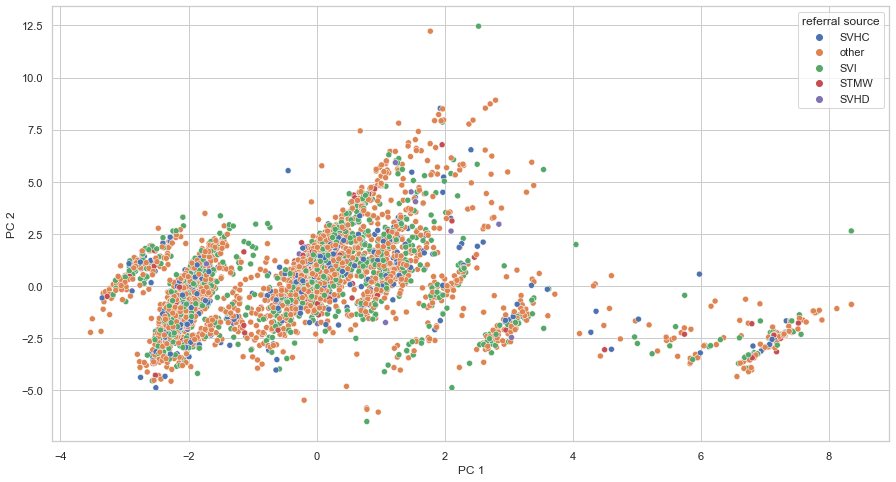

In [231]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(merged_df)

# Add the 2 components to poke_cat_df
thy['PC 1'] = pc[:, 0]
thy['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=thy, 
                x='PC 1', y='PC 2', hue='sex')
plt.show()

### PCA in a model pipeline : for RandomForestClassifier

In [240]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=0.5)),  # we can set here no. of components or use bw 0-1 to specify variance threshold
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train_imputed, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test_imputed, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.12283444 0.09679063 0.06392143 0.06097532 0.05453711 0.04354186
 0.03919047 0.03858736]
94.2% test set accuracy


Choosing the number of components

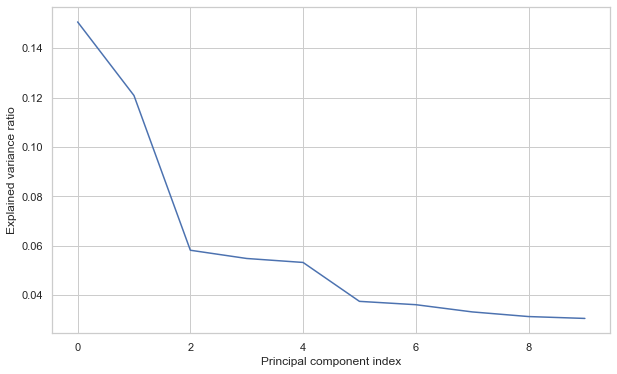

In [245]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(merged_df)

plt.figure(figsize=(10,6))
# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

#### The 'elbow' in the plot is at 3 components (the 3rd component has index 2).


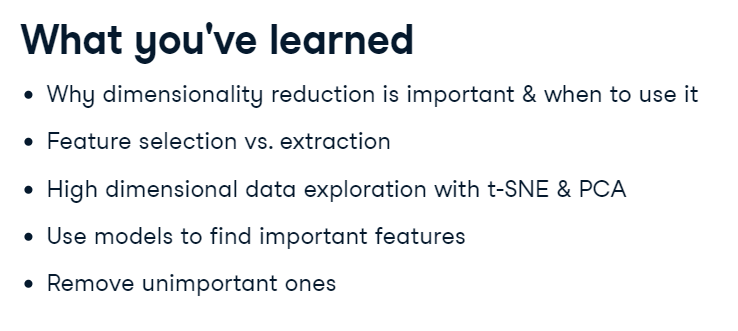

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
2185,73.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.50,1,2.0,1,134.0,1,1.17,1,115.0,0,0,1,0,0
521,38.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,44.00,1,1.7,1,59.0,1,1.04,1,57.0,0,0,0,0,1
1970,40.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.20,1,2.3,1,111.0,1,0.99,1,112.0,0,0,0,0,1
257,67.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.40,1,1.5,1,95.0,1,0.78,1,122.0,0,0,0,1,0
1399,72.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.85,0,NaN,1,131.0,1,0.91,1,144.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,75.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.90,1,1.4,1,107.0,1,0.92,1,116.0,0,0,0,0,1
340,26.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.25,1,1.8,1,120.0,1,0.85,1,140.0,0,1,0,0,0
1402,65.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.50,0,NaN,1,137.0,1,1.06,1,129.0,0,0,0,0,1
1759,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.80,1,1.8,1,93.0,1,0.79,1,117.0,0,1,0,0,0


In [272]:
# when we split using stratify =y the index is jumbled so when we merged X_train_imputed and X_test_imputed in merged df and use 'y' its not apples to appples. 
#Hence we need to merge t_train and y_test (to have same index)
y_train_df = pd.DataFrame({'binaryClass': y_train})  
y_test_df = pd.DataFrame({'binaryClass': y_test})
merged_df_y = pd.concat([y_train_df, y_test_df], axis=0)

In [273]:
merged_df_y

,binaryClass
2185,1
521,0
1970,0
257,1
1399,1
...,...
2993,1
106,1
1981,1
1350,1


In [256]:
merged_df1 = merged_df.drop(['x','y','PC 1','PC 2'], axis=1)
merged_df1

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,ref__STMW,ref__SVHC,ref__SVHD,ref__SVI,ref__other
0,1.119815,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,3.954893,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.108011,0.508382,-0.021954,0.261445,0.725738,0.342489,0.917381,0.341844,0.122517,-0.182307,-0.336662,9.349131,-0.603895,-1.193384
1,-0.726268,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,1.525426,0.508382,-0.388068,0.261445,-1.397057,0.342489,0.250040,0.341844,-1.635931,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
2,-0.620778,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,0.076981,0.508382,0.344160,0.261445,0.074748,0.342489,-0.006630,0.341844,0.031563,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
3,0.803343,1.476990,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.151307,0.508382,-0.632144,0.261445,-0.378115,0.342489,-1.084642,0.341844,0.334744,-0.182307,-0.336662,-0.106962,1.655918,-1.193384
4,1.067069,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.172955,-1.967026,-0.046361,0.261445,0.640827,0.342489,-0.417301,0.341844,1.001741,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,-0.779014,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,3.954893,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.119819,-1.967026,0.124492,0.261445,-0.236595,0.342489,0.763379,0.341844,-0.726389,-0.182307,-0.336662,-0.106962,-0.603895,0.837953
3768,0.328636,0.615373,2.728512,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,3.954893,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.206017,0.508382,1.564540,0.261445,0.584219,0.342489,1.225384,0.341844,-0.180664,-0.182307,-0.336662,-0.106962,1.655918,-1.193384
3769,-0.673523,0.615373,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,3.954893,-0.07301,-0.08853,-0.158114,0.0,-0.224725,0.334706,-0.182795,0.508382,-0.021954,0.261445,0.159660,0.342489,0.044704,0.341844,0.092199,-0.182307,-0.336662,-0.106962,1.655918,-1.193384
3770,0.275891,-0.677053,-0.366500,-0.115118,-0.103528,-0.196332,-0.119758,-0.113531,-0.129978,-0.252851,-0.252851,-0.07301,-0.08853,-0.158114,0.0,-0.224725,-2.987694,0.157748,0.508382,0.222122,-3.824897,0.023801,-2.919804,0.260307,-2.925309,-0.714262,-0.182307,-0.336662,-0.106962,-0.603895,0.837953


In [278]:
import shap

rf_model = RandomForestClassifier()

rf_model.fit(merged_df1,merged_df_y.values.ravel())

explainer = shap.Explainer(rf_model)

shap_values = explainer.shap_values(merged_df1)

shape

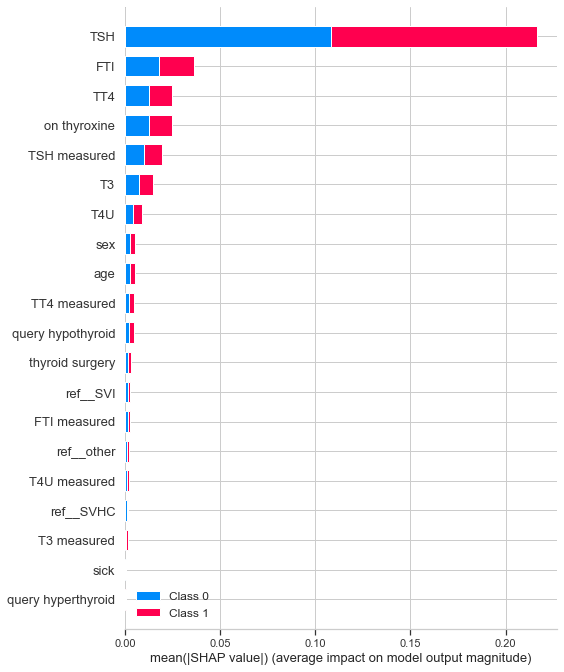

In [279]:
# Plot the summary plot
shap.summary_plot(shap_values, merged_df1, plot_type='bar')

# Show the plot
plt.show()

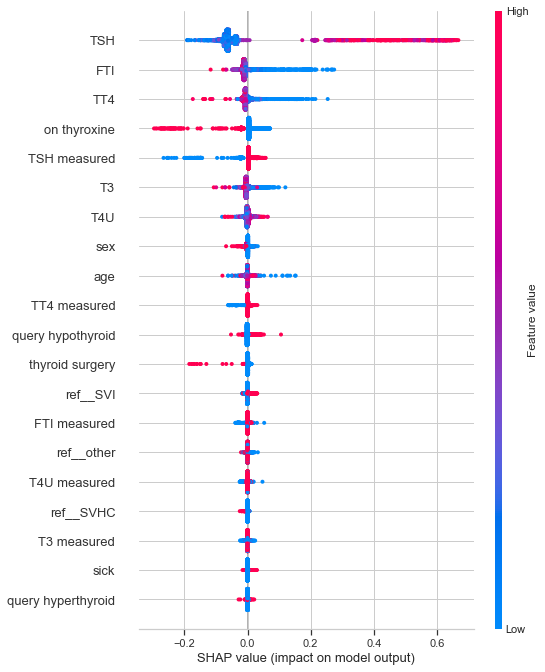

In [284]:
import shap
import matplotlib.pyplot as plt

# Assume you already have the trained model and SHAP values

# Check if shap_values is a list (multi-output) or array (single-output)
if isinstance(shap_values, list):
    shap_values = shap_values[0]  # Use the explanations for the first output class

# Create the summary plot
shap.summary_plot(shap_values, features=merged_df1, feature_names=merged_df1.columns)

# Show the plots
plt.show()


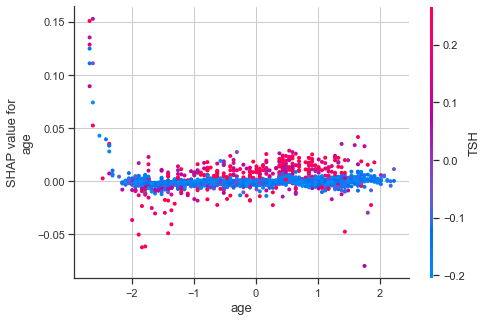

In [285]:
# Create a dependence plot for a specific feature
feature_index = 0  # Index of the feature you want to analyze
shap.dependence_plot(feature_index, shap_values, merged_df1, feature_names=merged_df1.columns)

plt.show()

In [102]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

results = []

# Instantiate the KNNImputer
imputer = KNNImputer()

# Define a list of scalers
scalers = [None, StandardScaler(), MinMaxScaler()]

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    CatBoostClassifier(silent=True),
    XGBClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier()
]

# Iterate over scalers
for scaler in scalers:
    if scaler:
        # Scale the training and test data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # Impute missing values in the training and test data
    X_train_imputed = imputer.fit_transform(X_train_scaled)
    X_test_imputed = imputer.transform(X_test_scaled)
    
    # Iterate over classifiers
    for classifier in classifiers:
        # Instantiate the classifier
        clf = classifier
        
        # Fit the classifier on the training data
        clf.fit(X_train_imputed, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test_imputed)

        # Calculate evaluation metrics
        confusion_mat = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results in a dictionary
        result = {
            'Scaler': type(scaler).__name__,
            'Classifier': type(classifier).__name__,
            'Confusion Matrix': confusion_mat,
            'Classification Report': report,
            'F1 Score': f1
        }

        results.append(result)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
df_results


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
0,NoneType,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
1,NoneType,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
2,NoneType,XGBClassifier,"[[72, 1], [6, 864]]",precision recall f1-score ...,0.995965
3,NoneType,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
4,NoneType,LogisticRegression,"[[44, 29], [4, 866]]",precision recall f1-score ...,0.981303
5,NoneType,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
6,StandardScaler,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
7,StandardScaler,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
8,StandardScaler,XGBClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
9,StandardScaler,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


In [103]:
from IPython.display import display

# Group the DataFrame by Classifier
df_grouped = df_results.groupby('Classifier')

# Iterate over the grouped DataFrame
for classifier, group in df_grouped:
    # Display the classifier name
    display(f"Classifier: {classifier}\n")
    
    # Display the group DataFrame
    display(group)
    display('\n')


'Classifier: AdaBoostClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
3,NoneType,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
9,StandardScaler,AdaBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
15,MinMaxScaler,AdaBoostClassifier,"[[71, 2], [4, 866]]",precision recall f1-score ...,0.996548


'\n'

'Classifier: CatBoostClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
1,NoneType,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
7,StandardScaler,CatBoostClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
13,MinMaxScaler,CatBoostClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


'\n'

'Classifier: DecisionTreeClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
5,NoneType,DecisionTreeClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125
11,StandardScaler,DecisionTreeClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701
17,MinMaxScaler,DecisionTreeClassifier,"[[71, 2], [2, 868]]",precision recall f1-score ...,0.997701


'\n'

'Classifier: LogisticRegression\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
4,NoneType,LogisticRegression,"[[44, 29], [4, 866]]",precision recall f1-score ...,0.981303
10,StandardScaler,LogisticRegression,"[[44, 29], [2, 868]]",precision recall f1-score ...,0.982456
16,MinMaxScaler,LogisticRegression,"[[10, 63], [1, 869]]",precision recall f1-score ...,0.964484


'\n'

'Classifier: RandomForestClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
0,NoneType,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
6,StandardScaler,RandomForestClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
12,MinMaxScaler,RandomForestClassifier,"[[72, 1], [4, 866]]",precision recall f1-score ...,0.997121


'\n'

'Classifier: XGBClassifier\n'

,Scaler,Classifier,Confusion Matrix,Classification Report,F1 Score
2,NoneType,XGBClassifier,"[[72, 1], [6, 864]]",precision recall f1-score ...,0.995965
8,StandardScaler,XGBClassifier,"[[72, 1], [5, 865]]",precision recall f1-score ...,0.996544
14,MinMaxScaler,XGBClassifier,"[[71, 2], [3, 867]]",precision recall f1-score ...,0.997125


'\n'